# Apresentação:

    A ideia aqui é começar a explorar o universo de
    redes neurais e como elas funcionam. Aqui vamos
    começar a trabalhar com uma rede de um único
    neurônio apenas.

#### Nome: André Amorim

# Código original:

In [186]:
import numpy as np
import matplotlib.pyplot as plt

In [187]:
dados_treino=np.array([[1,0,0.1,0.1],[1,1,0,0.1],[1,1,0,0.25],[1,1,1,1],[1,0,1.0,0.1],[1,0,0,0.2]])
print(dados_treino,dados_treino.shape)

[[1.   0.   0.1  0.1 ]
 [1.   1.   0.   0.1 ]
 [1.   1.   0.   0.25]
 [1.   1.   1.   1.  ]
 [1.   0.   1.   0.1 ]
 [1.   0.   0.   0.2 ]] (6, 4)


In [188]:
np.random.seed()

In [189]:
#inicializando pesos (Rede com 1 neurônio e 3 variaveis = 3 axonios)
pesos_axonios=np.array([[np.random.random()],[np.random.random()],[np.random.random()],[np.random.random()]])
print(pesos_axonios,pesos_axonios.shape)

[[0.23909527]
 [0.26457568]
 [0.33912921]
 [0.22173739]] (4, 1)


In [190]:
pesos_axonios = np.array([peso for peso in pesos_axonios]);pesos_axonios

array([[0.23909527],
       [0.26457568],
       [0.33912921],
       [0.22173739]])

In [191]:
# função de ativação Sigmoid (logistica)
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [192]:
# derivada da função de ativação Sigmoid aplicada em x=sigmoid(x)
def difsigmoid(x):
    return x*(1-x)

In [193]:
epocas= input('digite o numero de epocas: ')

if epocas == '':
  epocas = 50000
else:
  try:
    epocas = int(epocas)
  except:
    print('Digite um número inteiro.')
delta=0.025

digite o numero de epocas: 


In [194]:
erro_norm=[ 0 for n in range(epocas)]

In [195]:
target_treino=np.array([[1],[0],[0],[0.7],[1],[0]])
print(target_treino,target_treino.shape)

[[1. ]
 [0. ]
 [0. ]
 [0.7]
 [1. ]
 [0. ]] (6, 1)


In [196]:
def produto_escalar(matriz, vetor):
  '''
      Função que calcula o produto
  escalar estre duas matrizes.
  '''
  # Chegando a dimensão das matrizes:
  if matriz.shape[1]!= vetor.shape[0]:
    raise ValueError("A dimensão das matrizes não possibilita o calculo!")

  # Calculando o produto escalar:
  resultados = []
  for i, linha in enumerate(matriz):
      somas = 0
      for j in range(len(linha)):
          somas += linha[j] * vetor[j]
      resultados.append(somas)
  resultados = np.array(resultados)

  return resultados

In [197]:
for i in range(epocas):
  output_treino = sigmoid(produto_escalar(dados_treino,pesos_axonios)) # Avalia Saida filtrada sigmoid , Y_treino
  grad_descendente=(target_treino-output_treino)*difsigmoid(output_treino) # Calcula o gradiente descendente =(erro)*DF(Y_treino)
  pesos_axonios = pesos_axonios + delta*produto_escalar(dados_treino.T,grad_descendente) # Atualiza pesos
  erro=(target_treino-output_treino) # Calcula erro = (Y_treino - Y_inpup)
  #erro_norm[i]=np.sqrt(erro[0]**2 + erro[1]**2 + erro[2]**2 + erro[3]**2 + erro[4]**2 + erro[5]**2) # Norma do Erro
  erro_norm[i]=np.sqrt(erro[0]**2 + erro[1]**2 + erro[2]**2 + erro[3]**2 + erro[4]**2 + erro[5]**2) # Norma do Erro

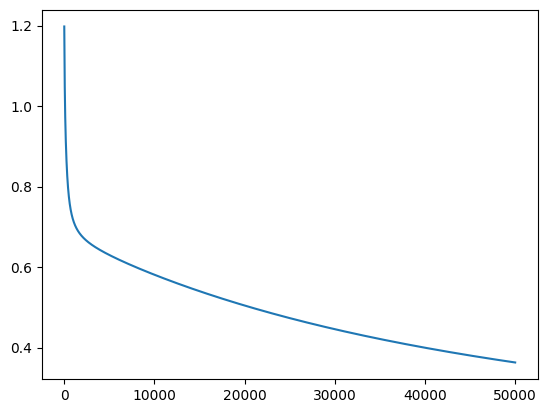

In [198]:
plt.plot(erro_norm)
plt.show()

# Alterações:

## Recriando a função np.dot

    A função dot da biblioteca numpy executa
    um produto escalar de modo que:


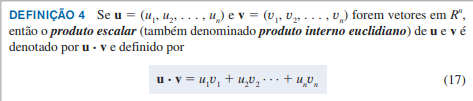

### Fonte: Álgebra Linear com Aplicações por Howard Anton (Autor), Chris Rorres (Autor)

    Deste modo a ideia aqui e reconstruir
    esse calculo modulando ele em uma função
    de modo a deixar o código mais legível.

**Nota**

    A função foi construida para multiplicar uma matriz por um vetor.
    Se quisermos generalizar esse calculo, precisaremos reescrever
    a função para novas necessidades dimensionais.

In [199]:
erro_norm=[ 0 for n in range(epocas)]

In [200]:
for i in range(epocas):
  output_treino = sigmoid(np.dot(dados_treino,pesos_axonios)) # Avalia Saida filtrada sigmoid , Y_treino
  grad_descendente=(target_treino-output_treino)*difsigmoid(output_treino) # Calcula o gradiente descendente =(erro)*DF(Y_treino)
  pesos_axonios = pesos_axonios + delta*np.dot(dados_treino.T,grad_descendente) # Atualiza pesos
  erro=(target_treino-output_treino) # Calcula erro = (Y_treino - Y_inpup)
  #erro_norm[i]=np.sqrt(erro[0]**2 + erro[1]**2 + erro[2]**2 + erro[3]**2 + erro[4]**2 + erro[5]**2) # Norma do Erro
  erro_norm[i]=np.sqrt(erro[0]**2 + erro[1]**2 + erro[2]**2 + erro[3]**2 + erro[4]**2 + erro[5]**2) # Norma do Erro

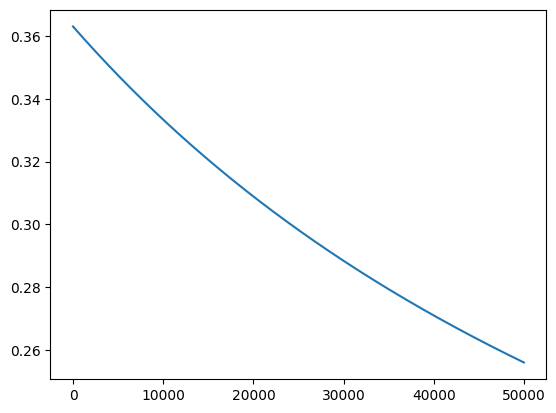

In [201]:
plt.plot(erro_norm)
plt.show()